In [1]:
library(plyr)
library(dplyr)
library(ggplot2)
library(ggforce)
library(svglite)
library(extrafont)
library(gridExtra)
library(grid)
library(cowplot)
library(ggrepel)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Registering fonts with R


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




# Energy consumption at scale

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.
Warning message:
“Duplicated aesthetics after name standardisation: width”


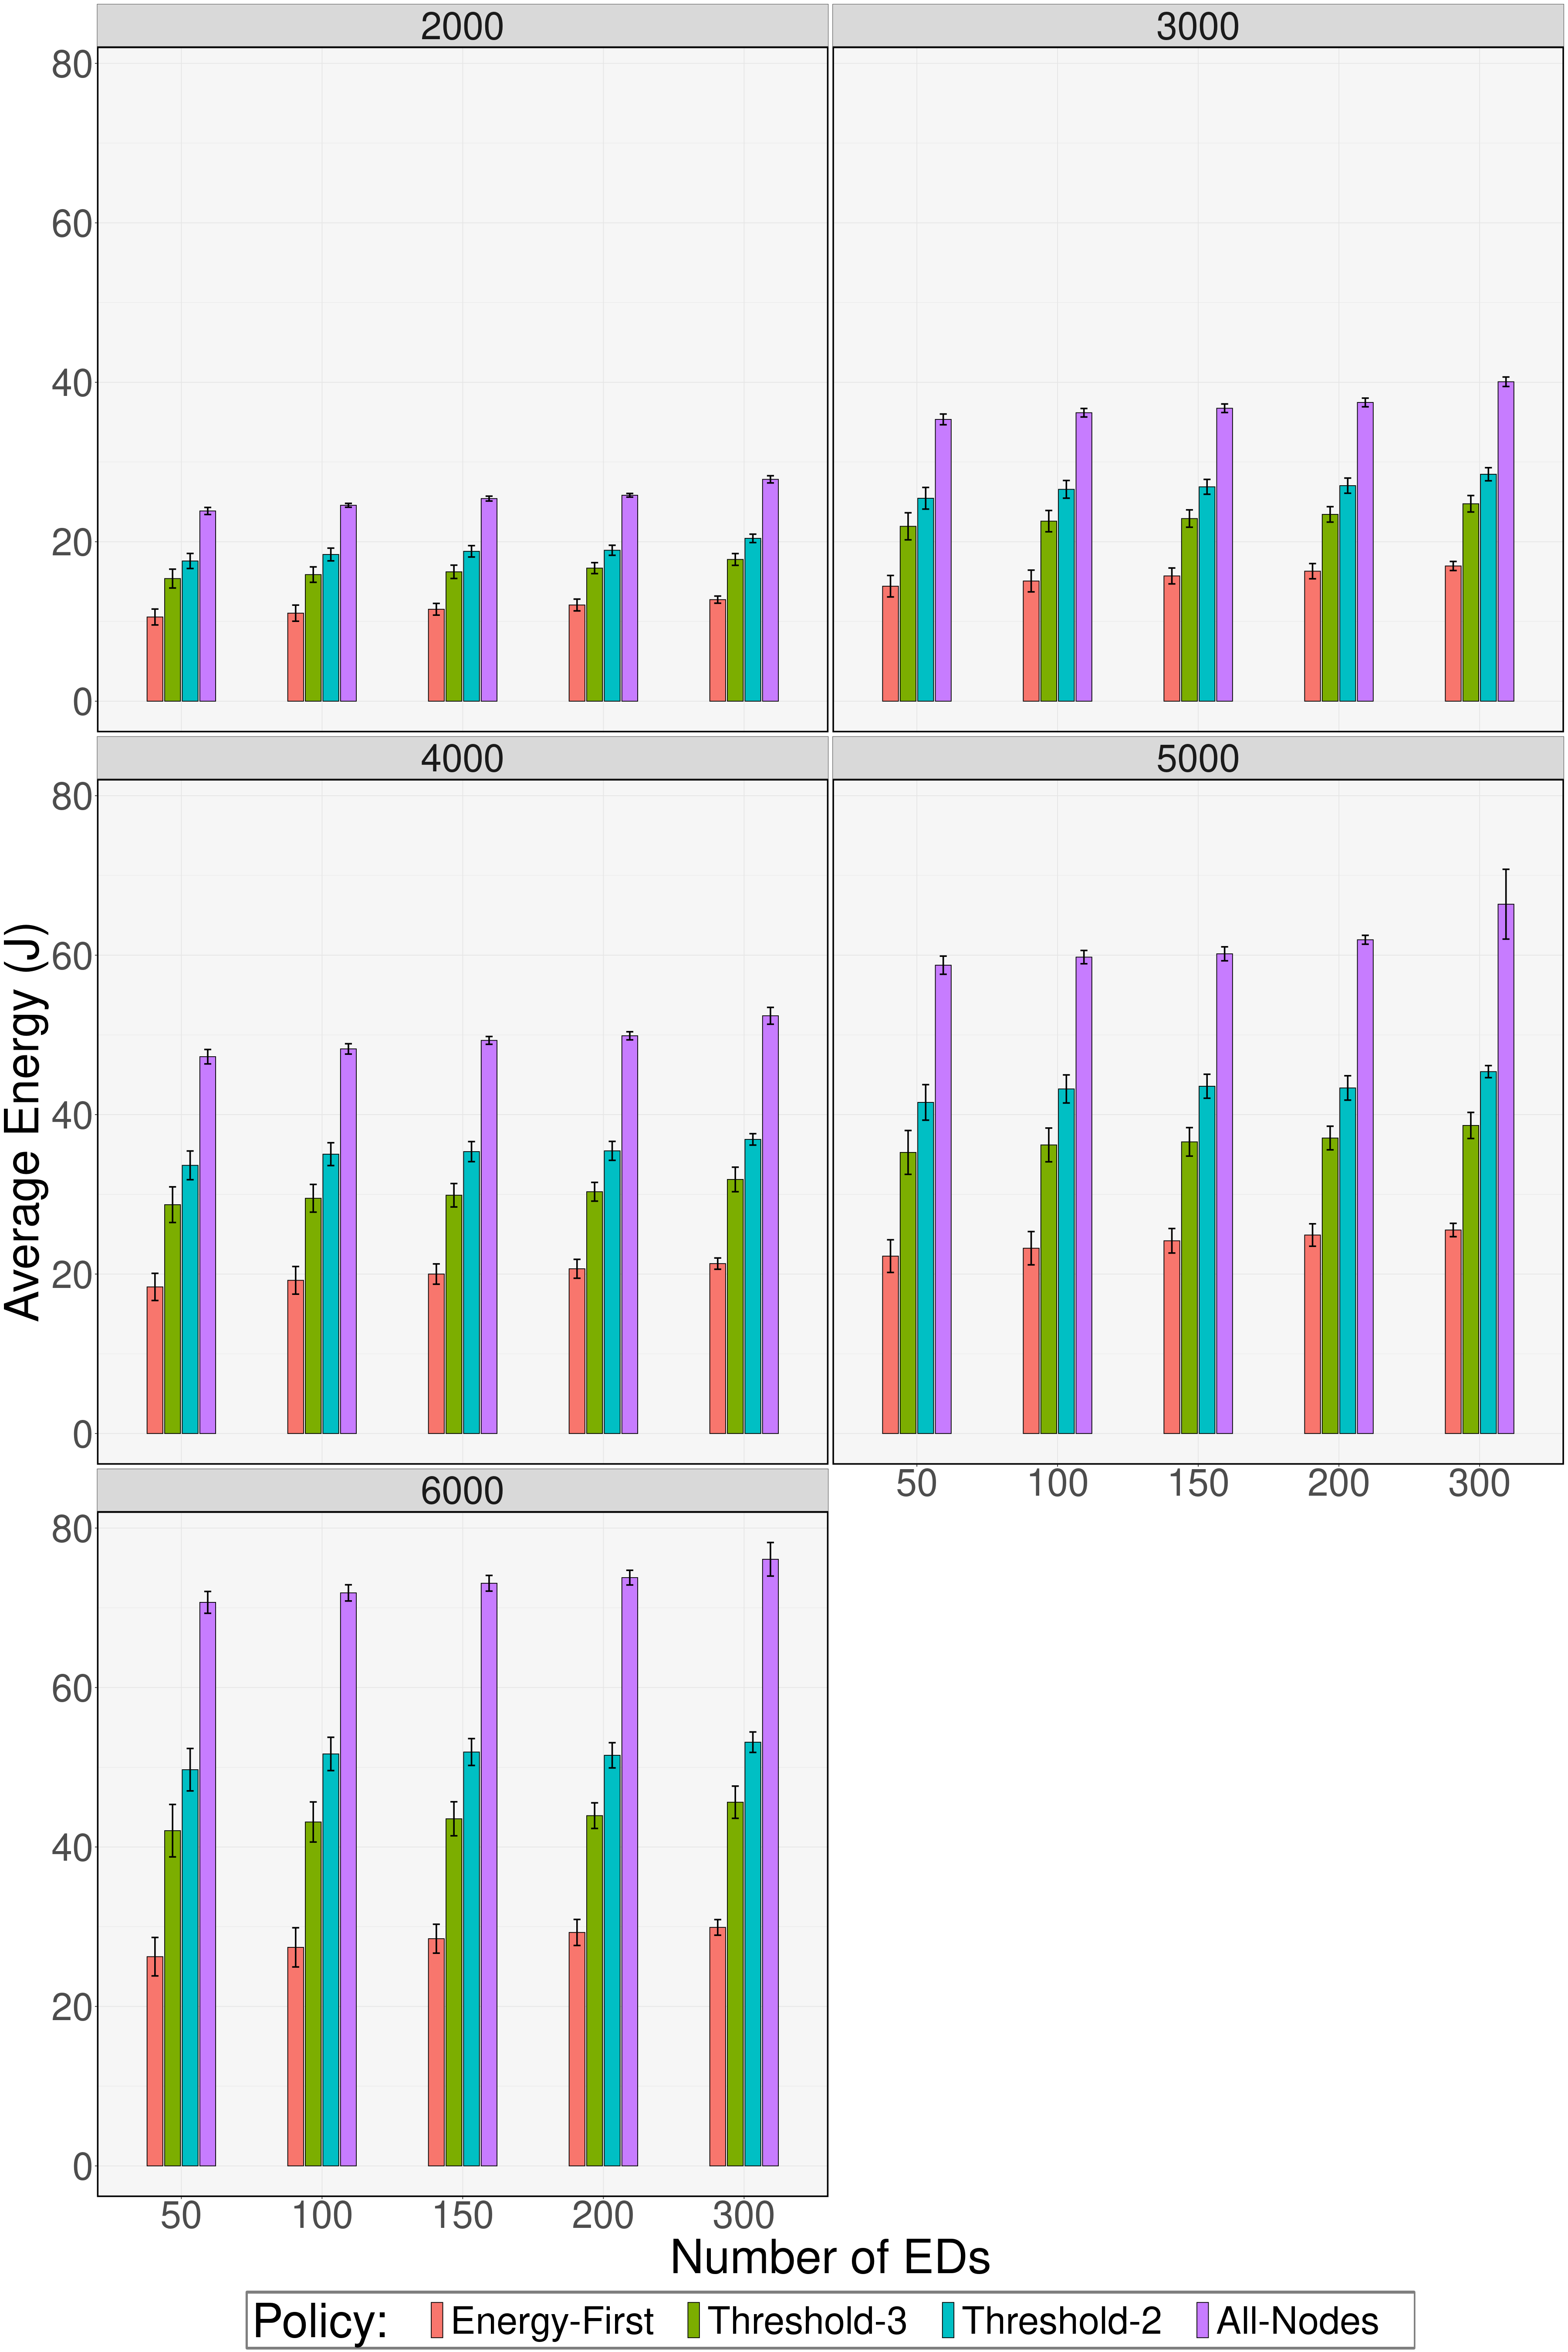

In [11]:
datans <- read.csv("logs_scale/test_den.csv", sep = ",") %>% 
    group_by(nb_ED, objSize, policy,seed) %>%
    summarize(totfinal=max(energy))
# Calculates mean, sd, se and IC, taken from https://r-graph-gallery.com/4-barplot-with-error-bar.html
datansStat <- datans %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(totfinal/nb_ED), sd=sd(totfinal/nb_ED)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))

datansStat <- datansStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))
datansStat$polClean <- factor(datansStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))


options(repr.plot.width=30, repr.plot.height=45)

p <- ggplot(data=datansStat, aes(x=factor(nb_ED), y=mean, fill=interaction(polClean))) + 
    geom_bar(position= position_dodge(width=0.5), stat = "identity", width=0.45, color="black")+
    geom_errorbar(data=datansStat, position= position_dodge(width=0.5), stat = "identity", width=0.2, 
                  aes(x=factor(nb_ED), ymin=mean-ic, ymax=mean+ic), width=0.4, colour="black", size=1) +
    labs(x="Number of EDs", y="Average Energy (J)", fill="Policy:   ")+
    facet_wrap(~objSize, ncol=2)+
    theme_bw() +
    theme( text = element_text(size = 65),
         legend.position = "bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.
Warning message:
“Duplicated aesthetics after name standardisation: width”


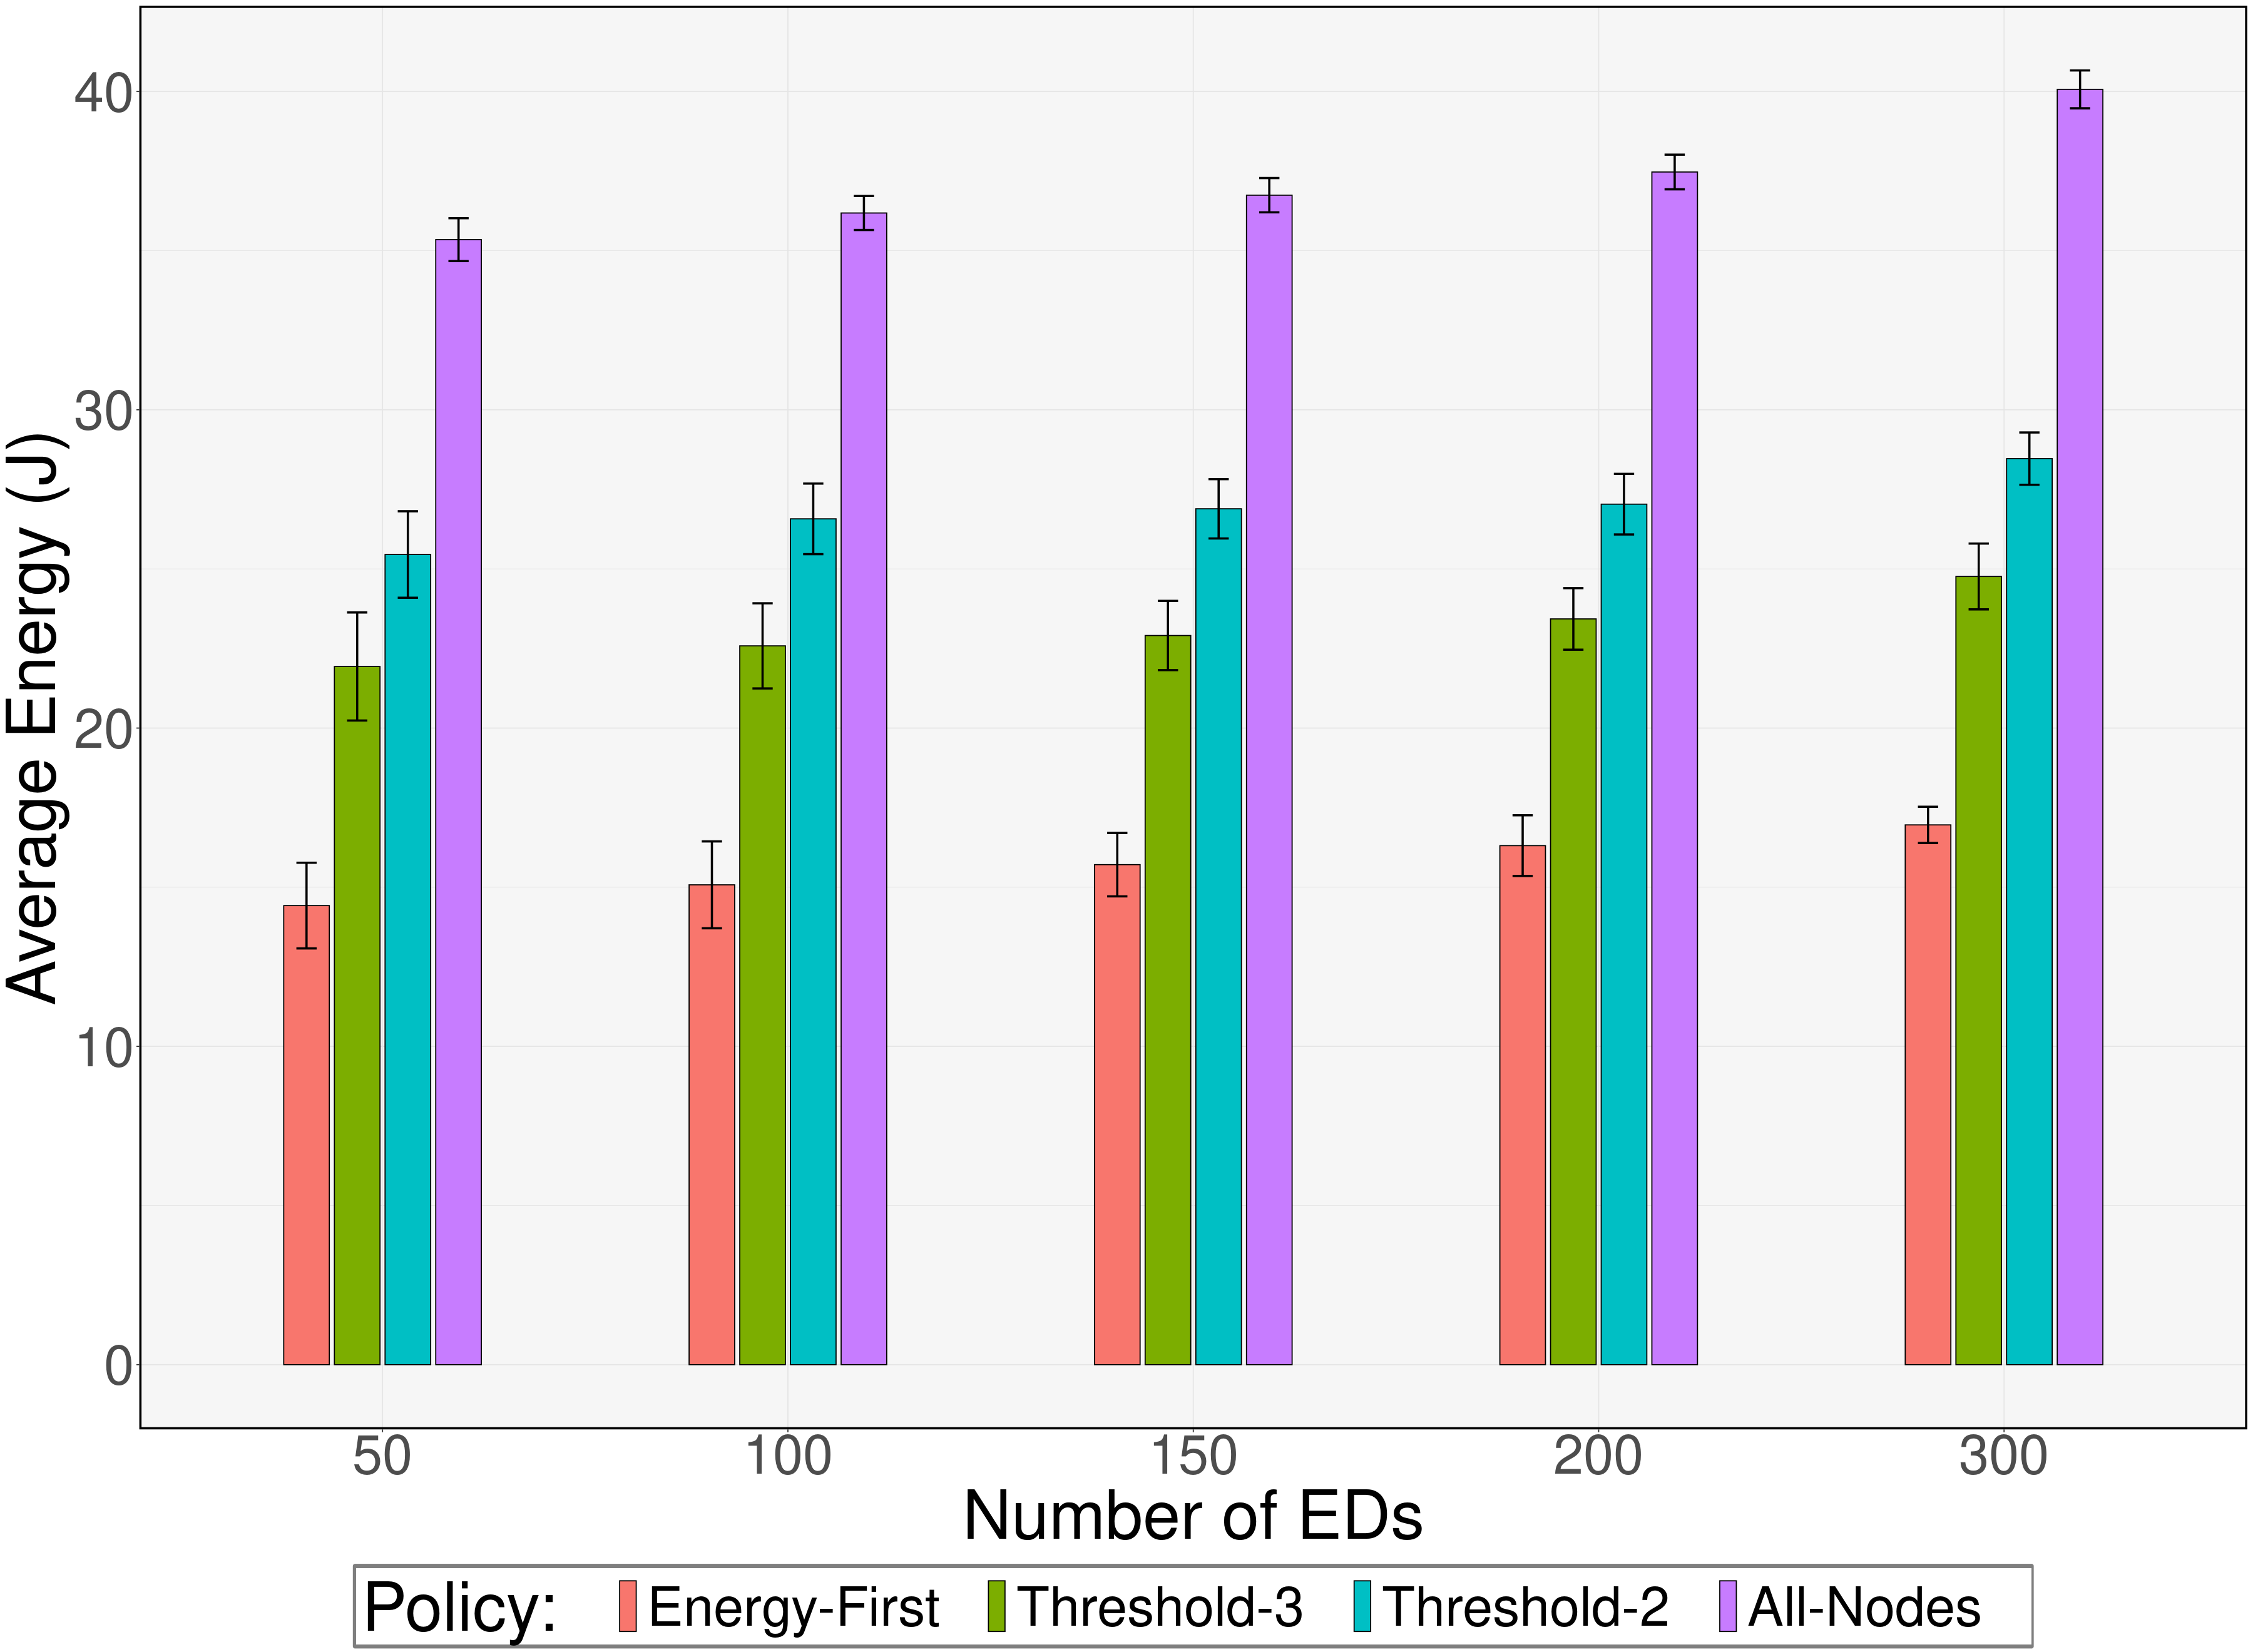

In [13]:
# figure used in the paper!

datans <- read.csv("logs_scale/test_den.csv", sep = ",") %>% 
    filter(objSize==3000)%>%
    group_by(nb_ED, objSize, policy,seed) %>%
    summarize(totfinal=max(energy))


# Calculates mean, sd, se and IC, taken from https://r-graph-gallery.com/4-barplot-with-error-bar.html
datansStat <- datans %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(totfinal/nb_ED), sd=sd(totfinal/nb_ED)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))

datansStat <- datansStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))
datansStat$polClean <- factor(datansStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))

options(repr.plot.width=30, repr.plot.height=22)

p <- ggplot(data=datansStat, aes(x=factor(nb_ED), y=mean, fill=interaction(polClean))) + 
    geom_bar(position= position_dodge(width=0.5), stat = "identity", width=0.45, color="black")+
    geom_errorbar(data=datansStat, position= position_dodge(width=0.5), stat = "identity", width=0.2, 
                  aes(x=factor(nb_ED), ymin=mean-ic, ymax=mean+ic), width=0.4, colour="black", size=1) +
    labs(x="Number of EDs", y="Average Energy (J)", fill="Policy:   ")+

    theme_bw() +
    theme( text = element_text(size = 65),
         legend.position = "bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p
ggsave("large_meanEN_objsize.pdf", plot=p, width=30, height=18)
embed_fonts("large_meanEN_objsize.pdf")

# Duration at scale

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.
Warning message:
“Duplicated aesthetics after name standardisation: width”


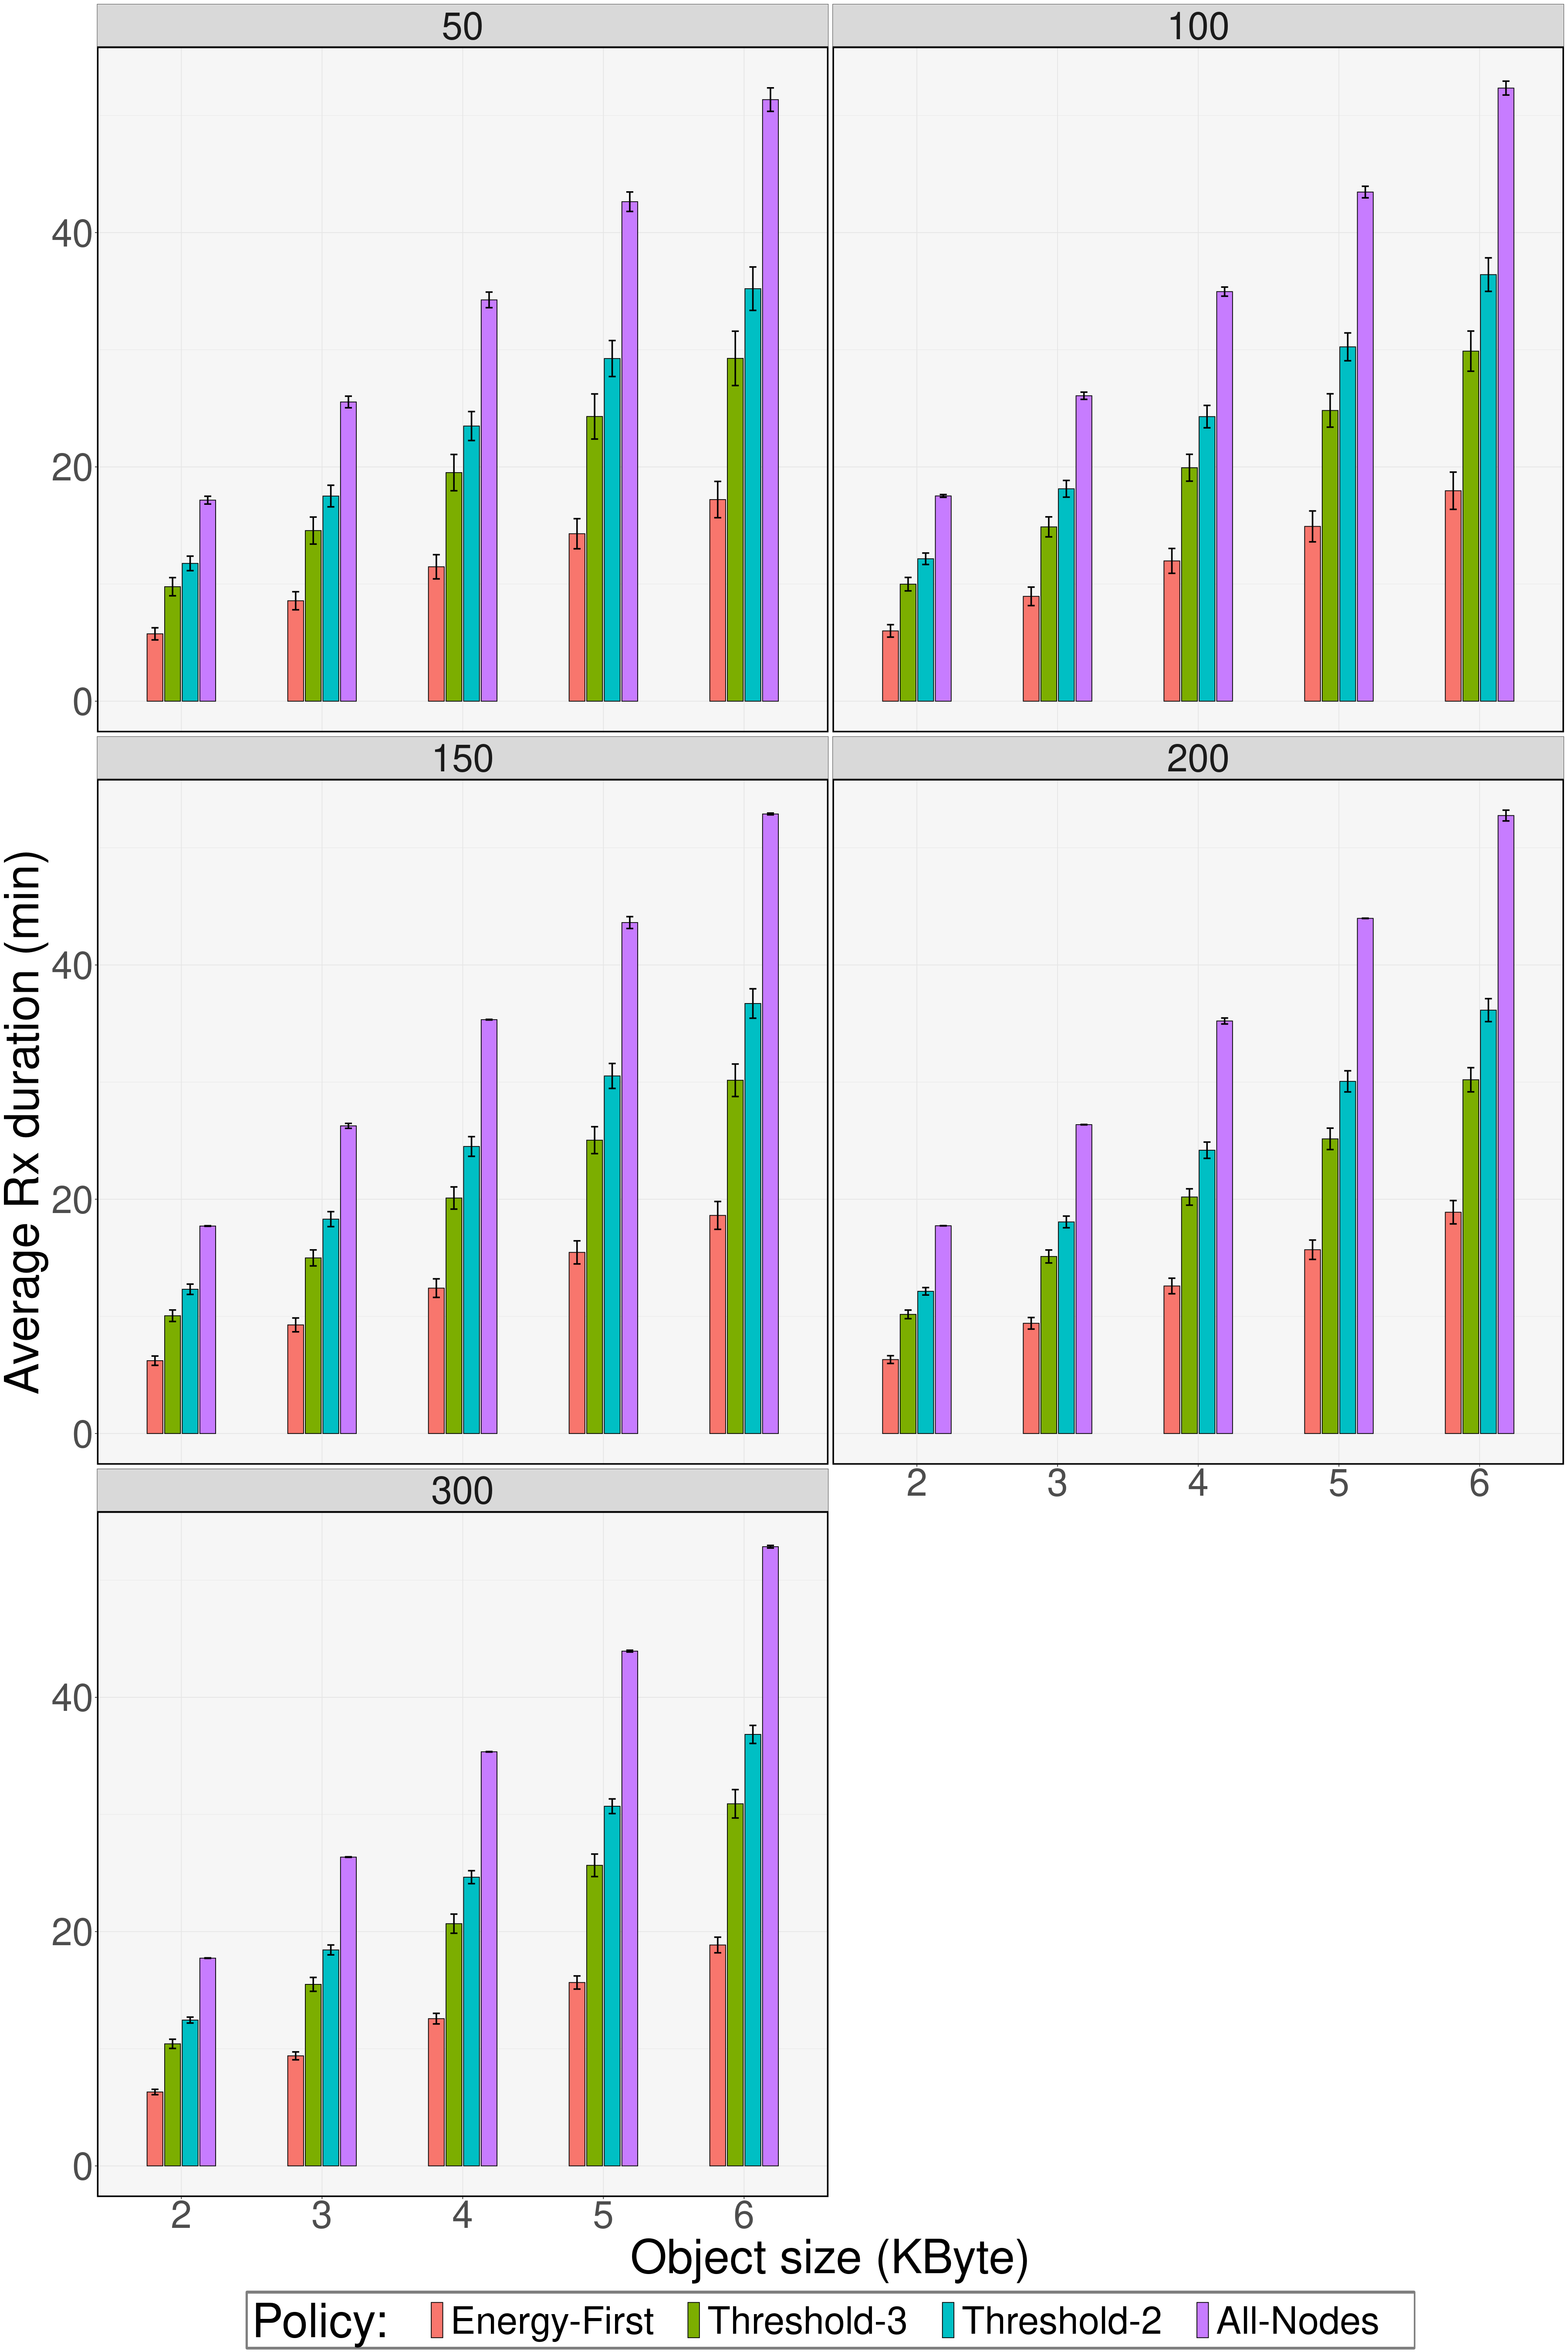

In [14]:
datans <- read.csv("logs_scale/test_d.csv", sep = ",") 
datansstat <- datans %>% group_by(nb_ED, objSize, policy,seed) %>% summarize(mean=mean(dur),min=min(dur),max=max(dur))
options(repr.plot.width=30, repr.plot.height=20)


# Calculates mean, sd, se and IC, taken from https://r-graph-gallery.com/4-barplot-with-error-bar.html
#head(datans)
datansStat <- datans %>% 
  mutate(dur=dur/60) %>%
  group_by(nb_ED,objSize,policy,seed) %>%
  summarise(durM=mean(dur)) 

dataStat <- datansStat %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(durM), sd=sd(durM)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
#dataStat


dataStat <- dataStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))

options(repr.plot.width=30, repr.plot.height=45)

dataStat$polClean <- factor(dataStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))
p <- ggplot(data=dataStat, aes(x=factor(objSize/1000), y=mean, fill=interaction(polClean))) + 
    geom_bar(position= position_dodge(width=0.5), stat = "identity", width=0.45, color="black")+
    geom_errorbar(data=dataStat, position= position_dodge(width=0.5), stat = "identity", width=0.2, 
                  aes(x=factor(objSize/1000), ymin=mean-ic, ymax=mean+ic), width=0.4, colour="black", size=1) +
    labs(x="Object size (KByte)", y="Average Rx duration (min)", fill="Policy:   ")+
    facet_wrap(~nb_ED, ncol=2)+
    theme_bw() +
    theme( text = element_text(size = 65),
         legend.position = "bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.
Warning message:
“Duplicated aesthetics after name standardisation: width”


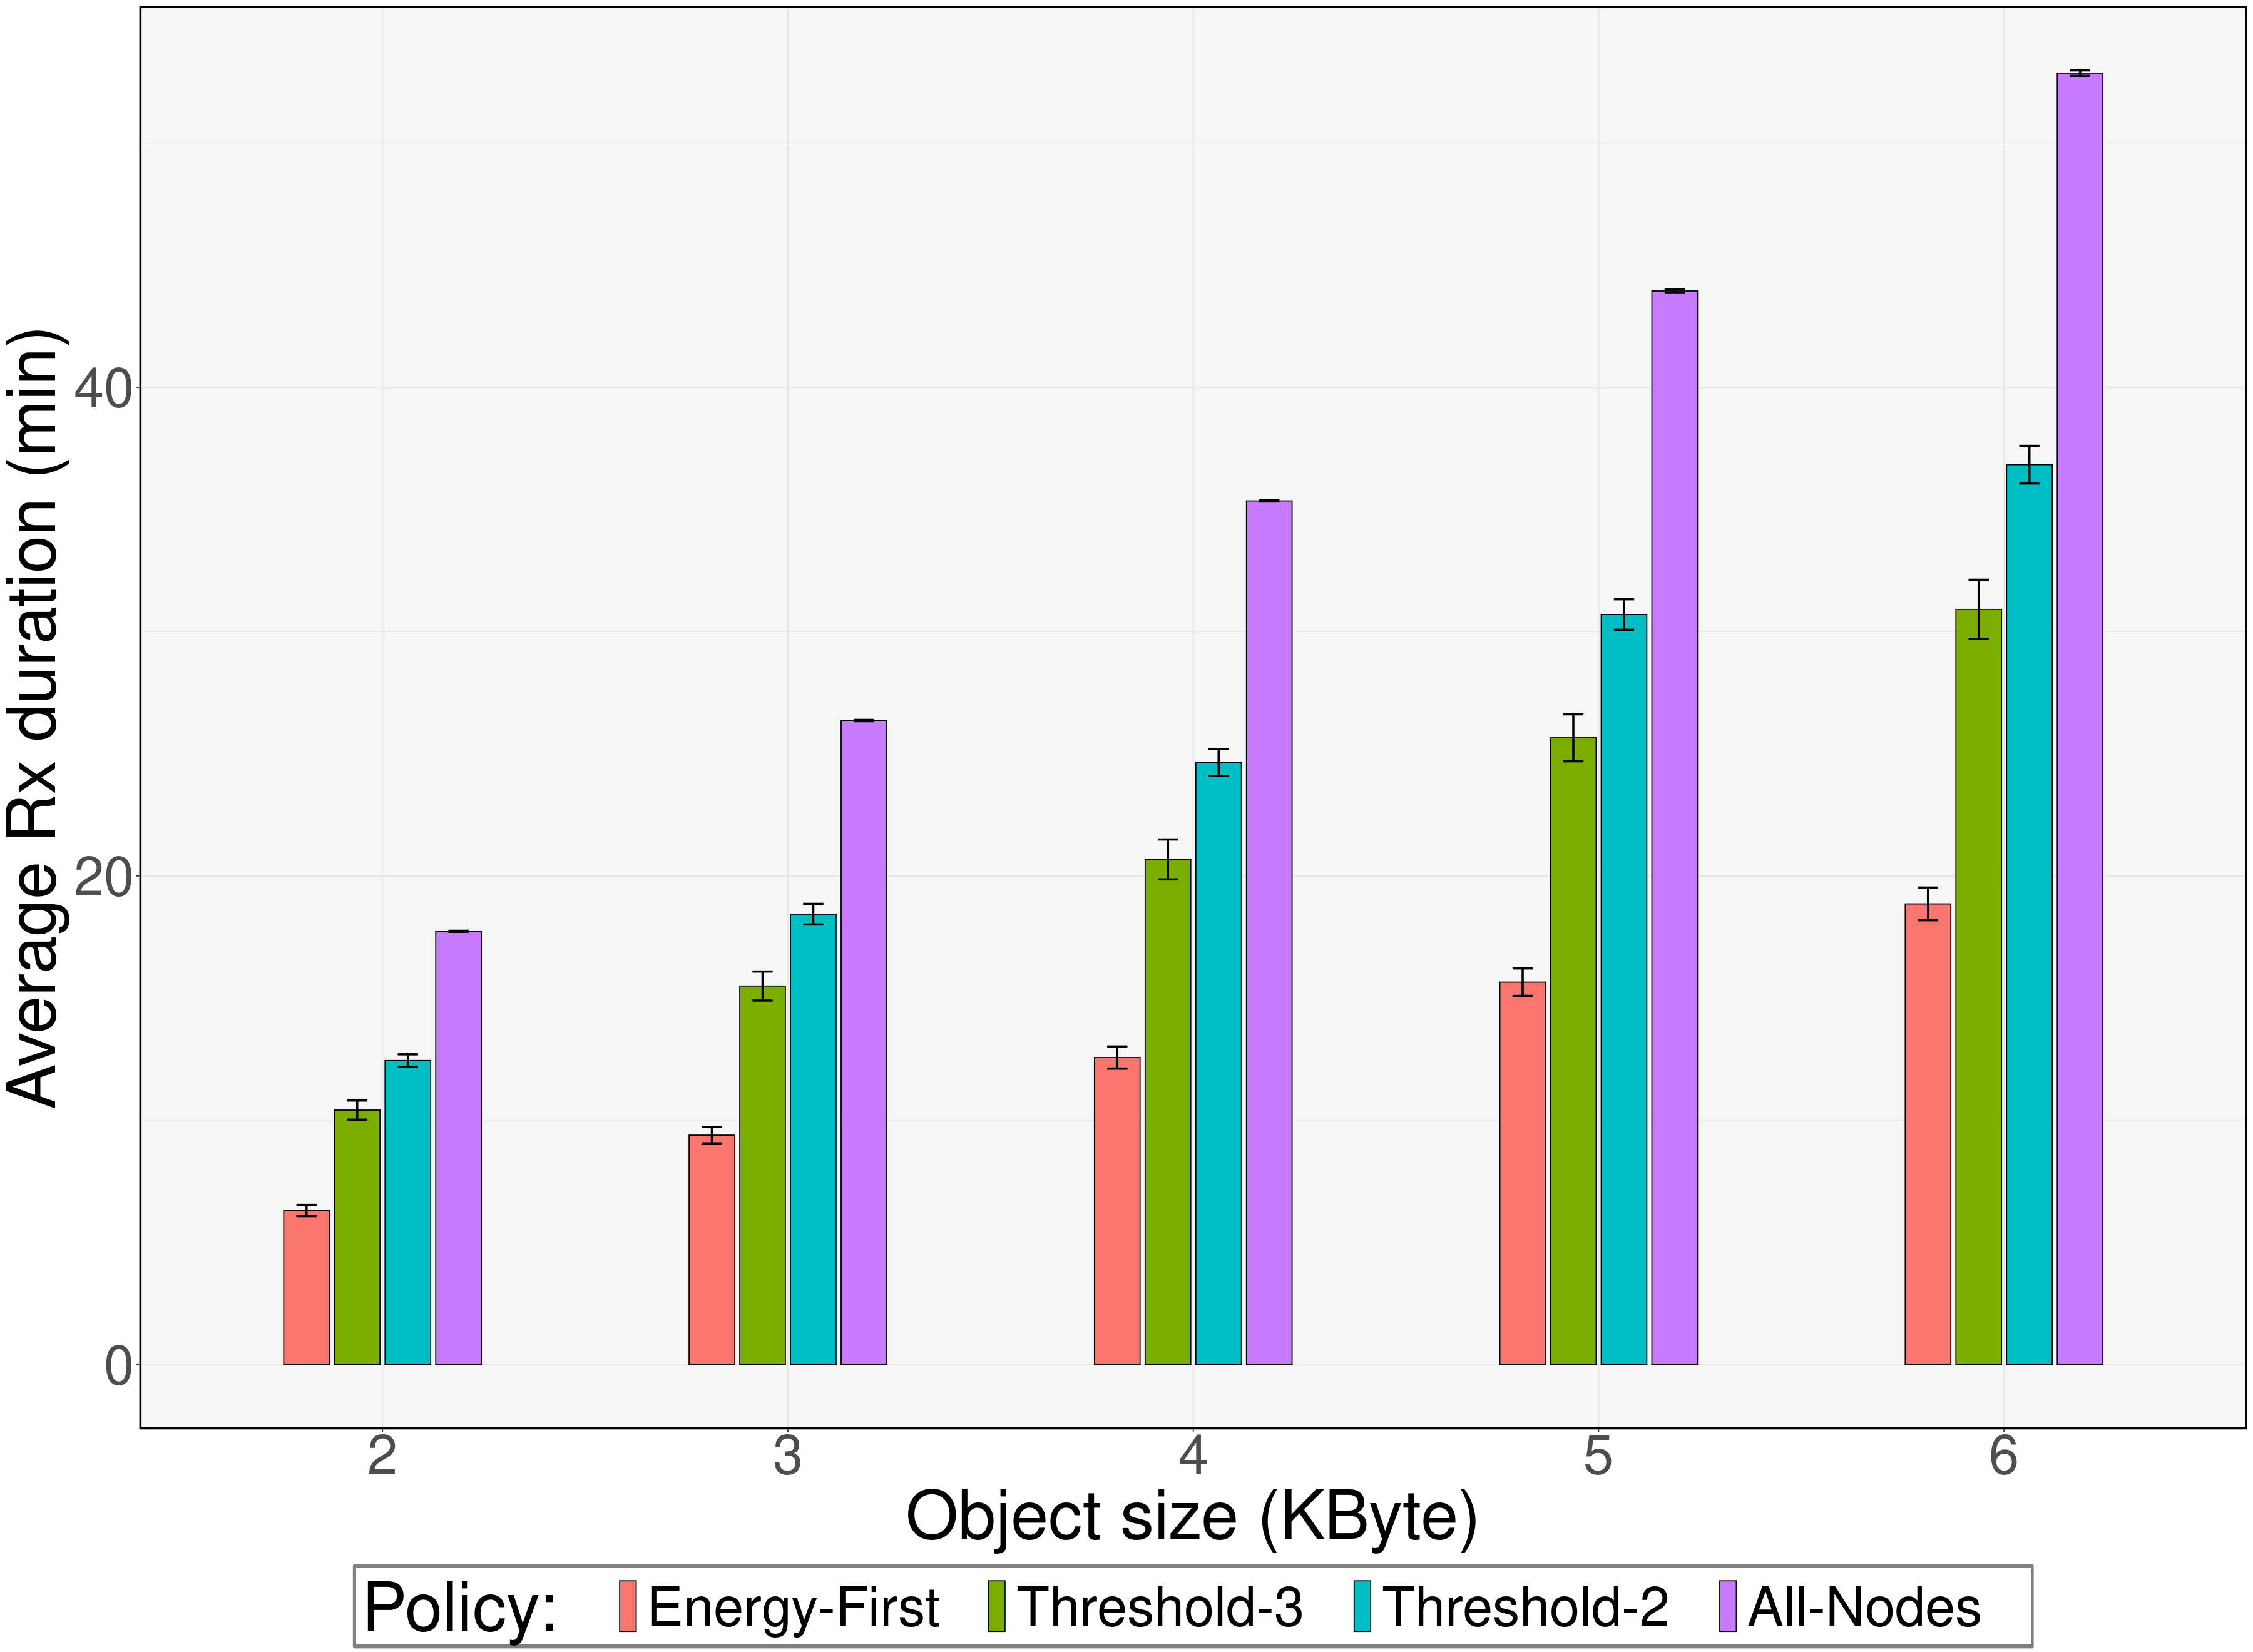

In [15]:
datans <- read.csv("logs_scale/test_d.csv", sep = ",") 
datansstat <- datans %>% group_by(nb_ED, objSize, policy,seed) %>% summarize(mean=mean(dur),min=min(dur),max=max(dur))
options(repr.plot.width=30, repr.plot.height=20)


# Calculates mean, sd, se and IC, taken from https://r-graph-gallery.com/4-barplot-with-error-bar.html
#head(datans)
datansStat <- datans %>% filter(nb_ED==300) %>%
  mutate(dur=dur/60) %>%
  group_by(nb_ED,objSize,policy,seed) %>%
  summarise(durM=mean(dur)) 

dataStat <- datansStat %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(durM), sd=sd(durM)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))
#dataStat


dataStat <- dataStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))
dataStat$polClean <- factor(dataStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))

options(repr.plot.width=30, repr.plot.height=22)

p <- ggplot(data=dataStat, aes(x=factor(objSize/1000), y=mean, fill=interaction(polClean))) + 
    geom_bar(position= position_dodge(width=0.5), stat = "identity", width=0.45, color="black")+
    geom_errorbar(data=dataStat, position= position_dodge(width=0.5), stat = "identity", width=0.2, 
                  aes(x=factor(objSize/1000), ymin=mean-ic, ymax=mean+ic), width=0.4, colour="black", size=1) +

    labs(x="Object size (KByte)", y="Average Rx duration (min)", fill="Policy:   ")+
    theme_bw() +
    theme( text = element_text(size = 65),
         legend.position = "bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p

ggsave("large_meanDur_objsize.pdf", plot=p, width=30, height=18)
embed_fonts("large_meanDur_objsize.pdf")


# Rx/Tx Ratio

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy', 'seed'. You
can override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.


nb_ED,objSize,policy,seed,RX_TX_Ratio
<int>,<int>,<chr>,<int>,<dbl>
50,2000,ALL,1,0.1453402
50,2000,ALL,2,0.1623521
50,2000,ALL,3,0.1462334
50,2000,ALL,4,0.1475592
50,2000,ALL,5,0.1843658
50,2000,ALL,6,0.1549815


`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.


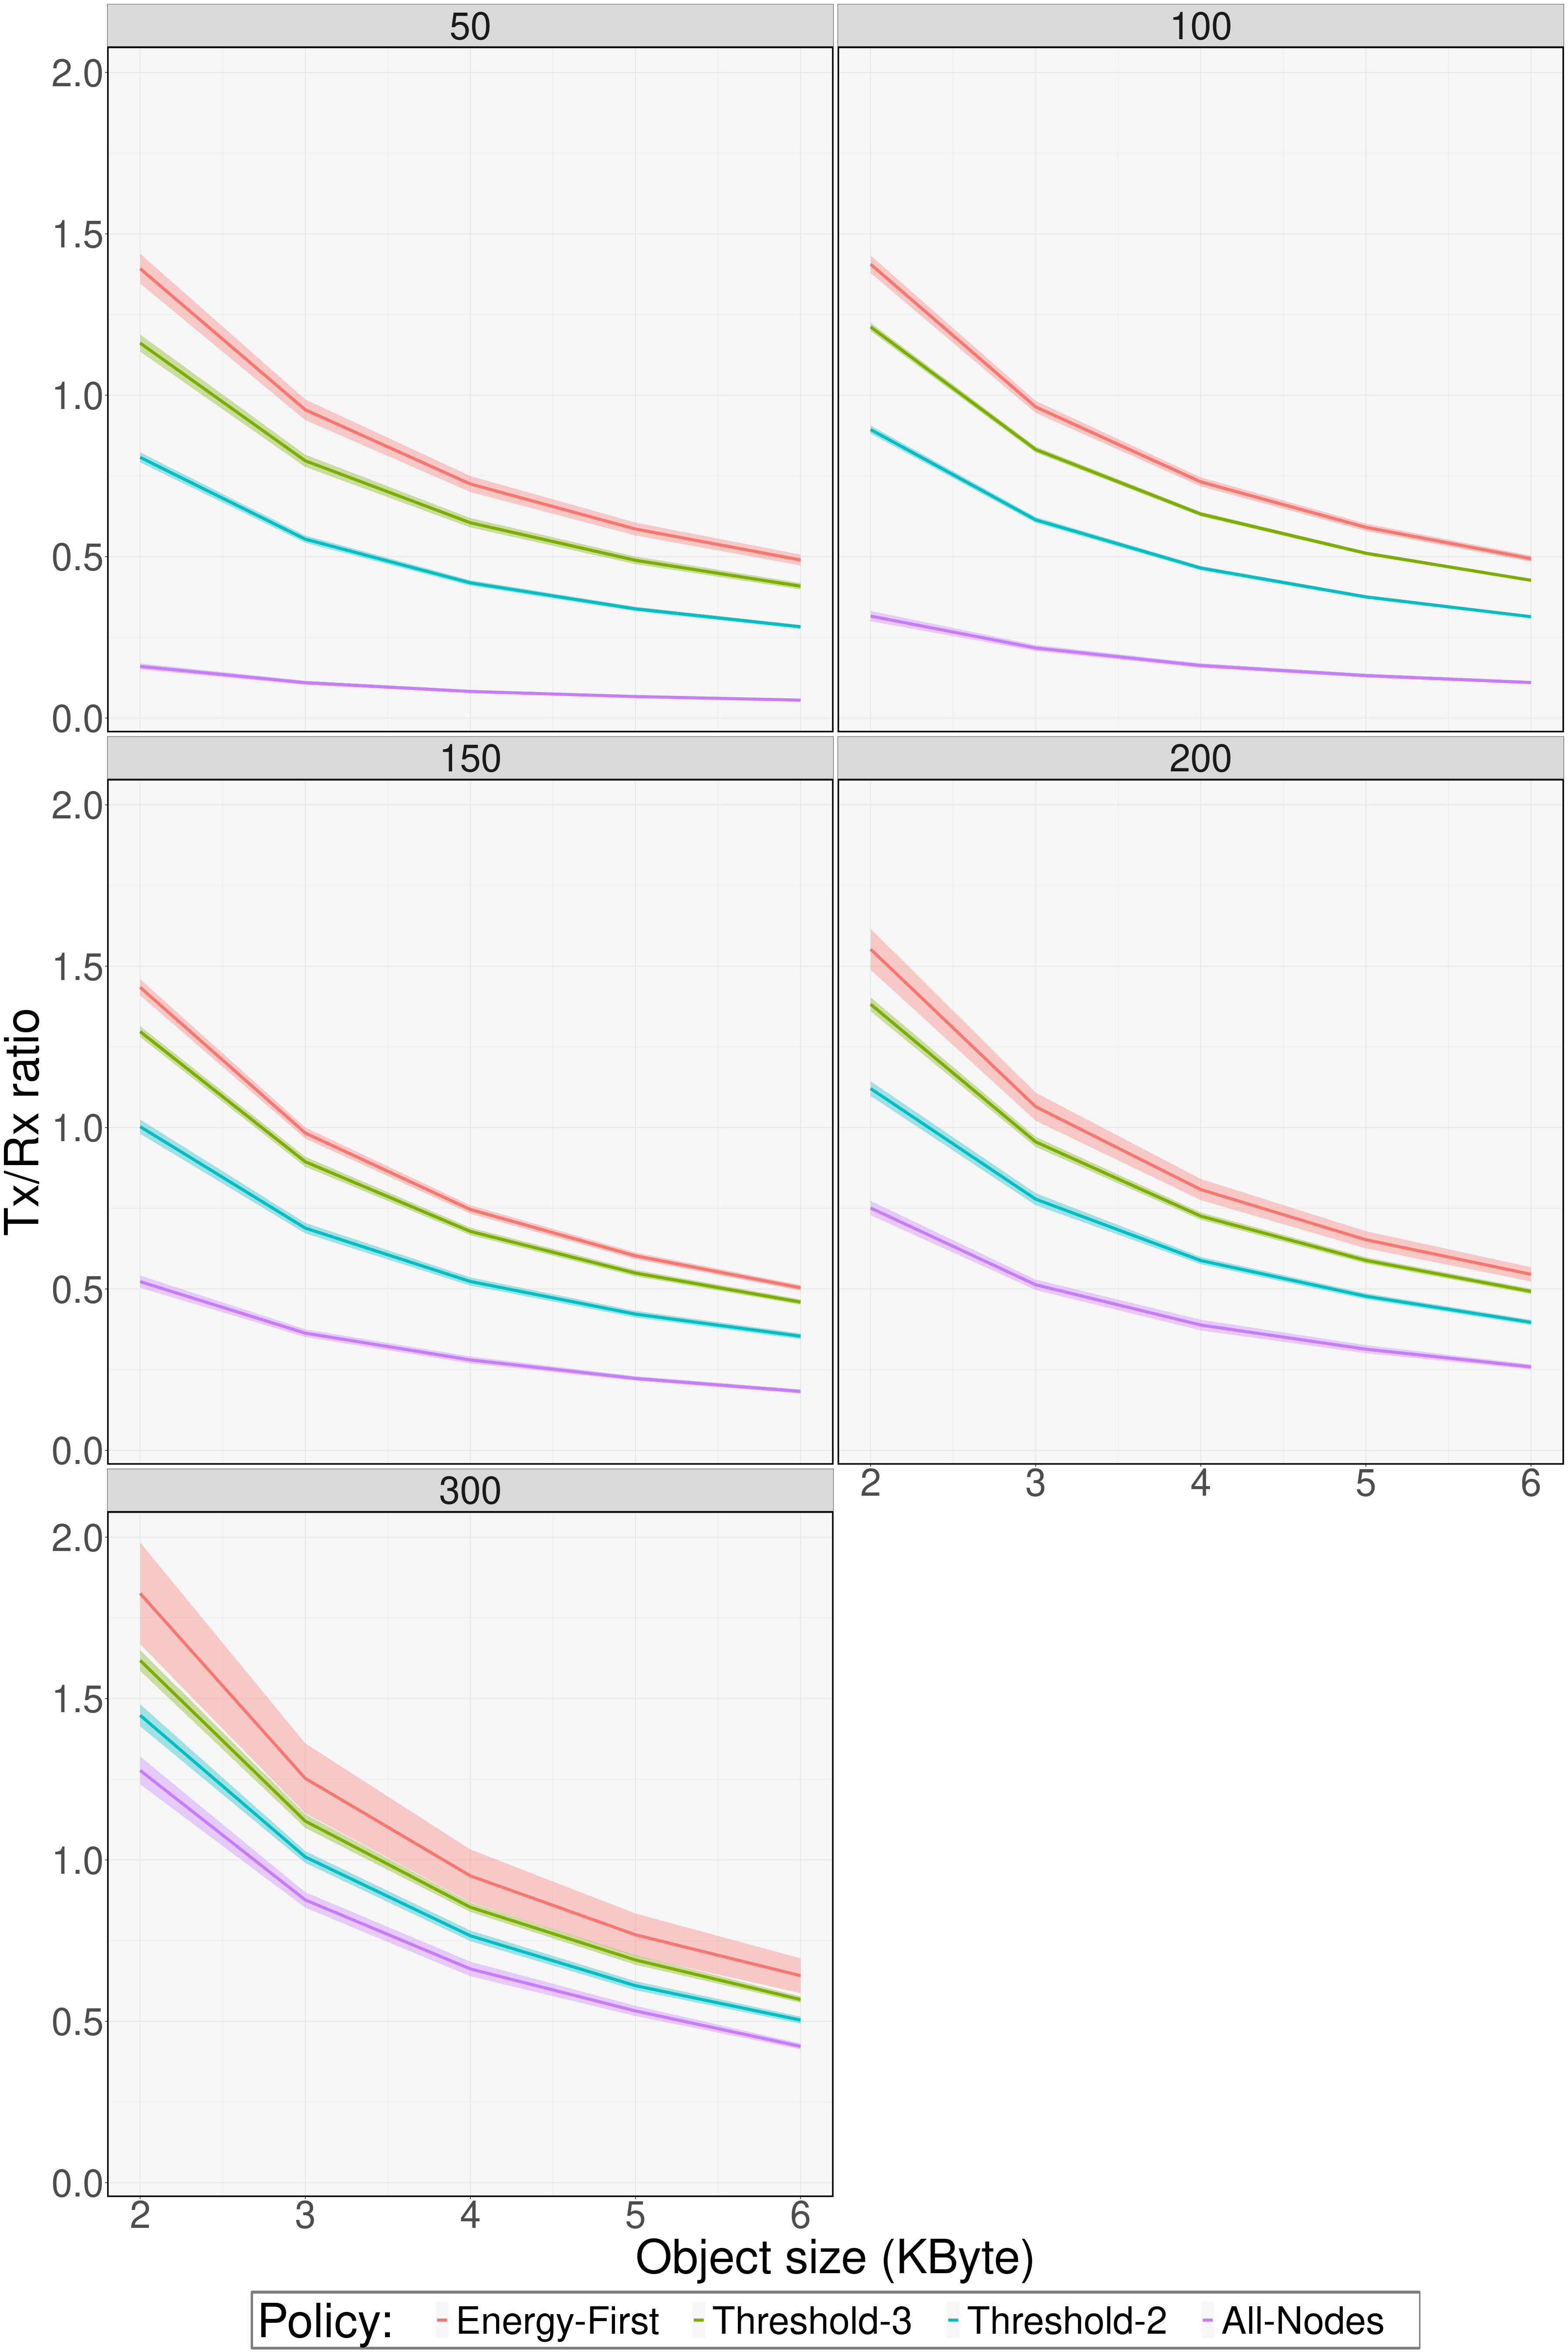

In [19]:
datans <- read.csv("logs_scale/test.csv", sep = ",") %>% 
    group_by(nb_ED, objSize, policy, seed,event) %>%
    summarize(nbEvents=n()) %>% summarize(RX_TX_Ratio = nbEvents[event == "TX"]/nbEvents[event == "RX"])
head(datans)

datansStat <- datans %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(RX_TX_Ratio), sd=sd(RX_TX_Ratio)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))


datansStat <- datansStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))
datansStat$polClean <- factor(datansStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))


options(repr.plot.width=30, repr.plot.height=45)

p <- ggplot(data=datansStat, aes(x=objSize/1000, y=mean, color=(polClean))) + 
    geom_ribbon(data=datansStat, aes(x=objSize/1000, y=mean, ymin=mean-ic, ymax=mean+ic, fill=polClean), color="#FFFFFF00", alpha=0.35, size=2) +
    geom_line(size=2)+
    facet_wrap(~nb_ED, ncol=2)+
    theme_bw() +
    labs(x="Object size (KByte)", y="Tx/Rx ratio", color="Policy:   ")+ guides(fill="none")+
    theme( text = element_text(size = 65),   
        legend.position="bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p

`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy', 'seed'. You
can override using the `.groups` argument.
`summarise()` has grouped output by 'nb_ED', 'objSize', 'policy'. You can
override using the `.groups` argument.


nb_ED,objSize,policy,seed,RX_TX_Ratio
<int>,<int>,<chr>,<int>,<dbl>
300,2000,ALL,1,1.252506
300,2000,ALL,2,1.349774
300,2000,ALL,3,1.165931
300,2000,ALL,4,1.287011
300,2000,ALL,5,1.277818
300,2000,ALL,6,1.293186


`summarise()` has grouped output by 'nb_ED', 'objSize'. You can override using
the `.groups` argument.


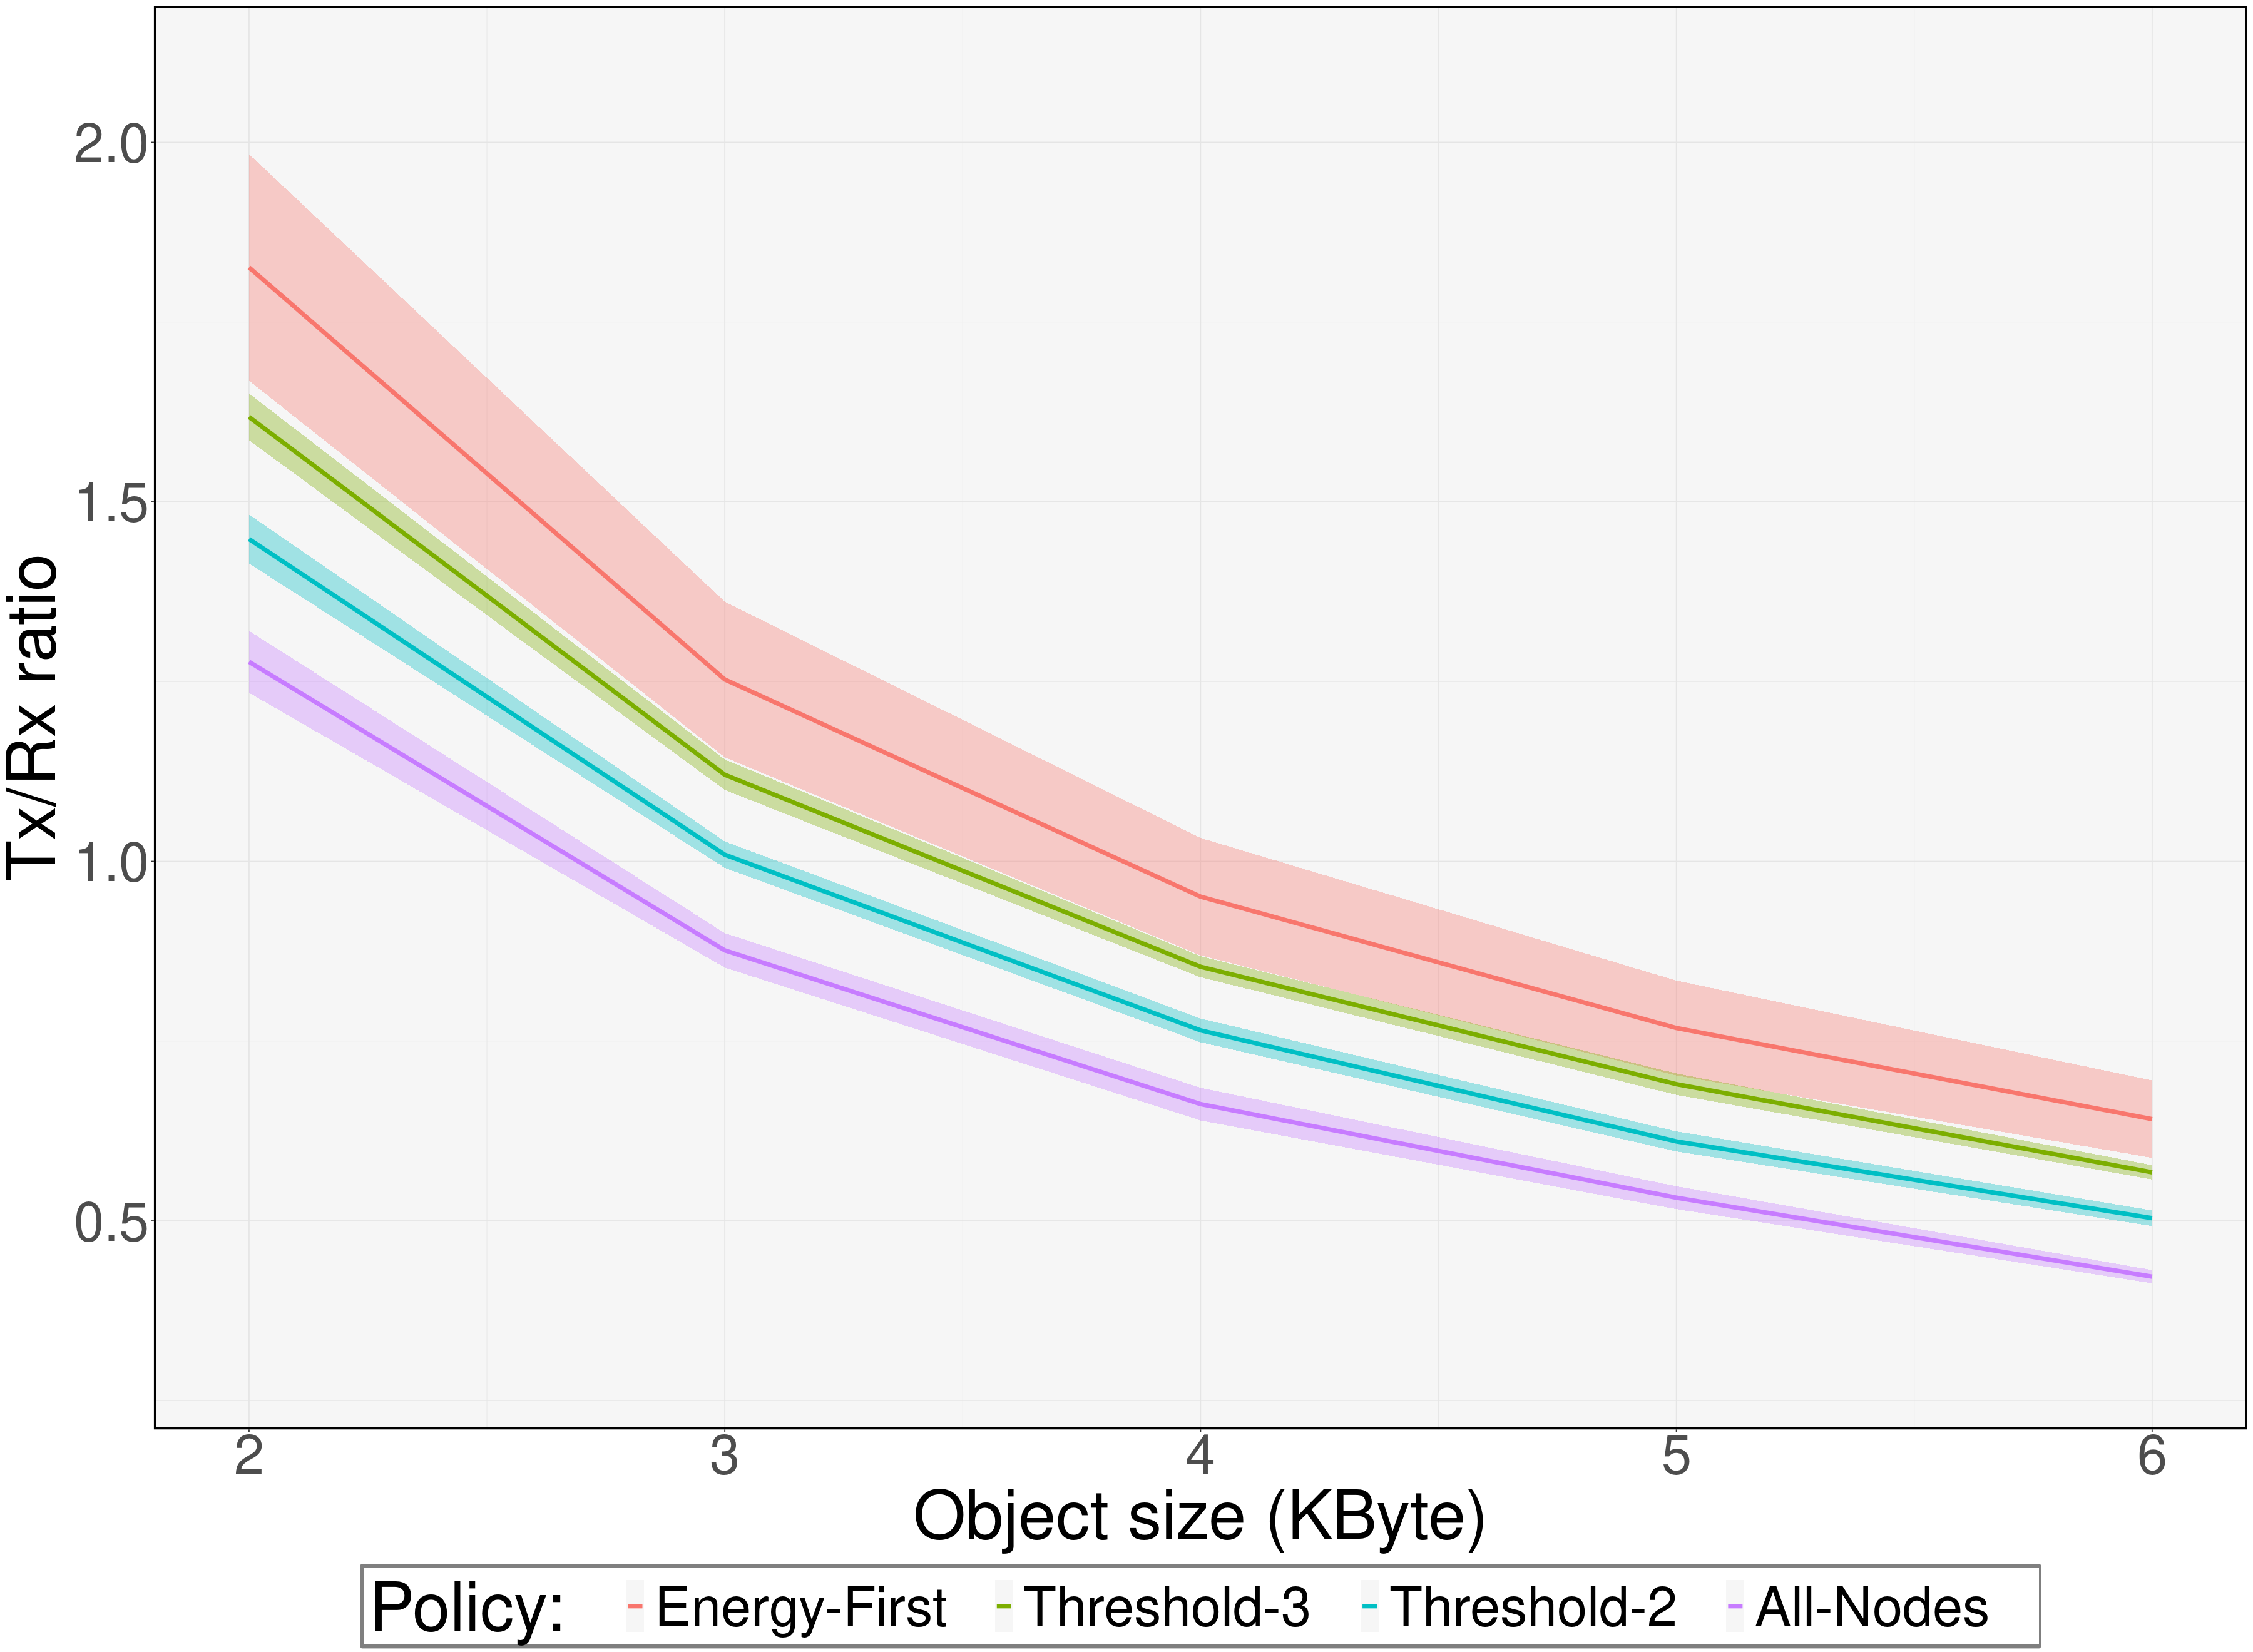

In [18]:
datans <- read.csv("logs_scale/test.csv", sep = ",") %>% 
    filter(nb_ED==300)%>%
    group_by(nb_ED, objSize, policy, seed,event) %>%
    summarize(nbEvents=n()) %>% summarize(RX_TX_Ratio = nbEvents[event == "TX"]/nbEvents[event == "RX"])
head(datans)

datansStat <- datans %>%
  group_by(nb_ED,objSize,policy) %>%
  summarise(n=n(), mean=mean(RX_TX_Ratio), sd=sd(RX_TX_Ratio)) %>%
  mutate( se=sd/sqrt(n))  %>%
  mutate( ic=se * qt((1-0.05)/2 + .5, n-1))


datansStat <- datansStat %>% 
  mutate(polClean = case_when(str_detect(policy, "FASTEST" ) ~ "Energy-First",
                              str_detect(policy, "THRESHOLD2" ) ~ "Threshold-2",
                              str_detect(policy, "THRESHOLD3" ) ~ "Threshold-3",
                              str_detect(policy, "ALL" ) ~ "All-Nodes",))
datansStat$polClean <- factor(datansStat$polClean, levels =  c("Energy-First", "Threshold-3", "Threshold-2", "All-Nodes"))


options(repr.plot.width=30, repr.plot.height=22)

p <- ggplot(data=datansStat, aes(x=objSize/1000, y=mean, color=(polClean))) + 
    geom_ribbon(data=datansStat, aes(x=objSize/1000, y=mean, ymin=mean-ic, ymax=mean+ic, fill=polClean), color="#FFFFFF00", alpha=0.35, size=2) +
    geom_line(size=2)+
    ylim(0.3,2.1)+
    theme_bw() +
    labs(x="Object size (KByte)", y="Tx/Rx ratio", color="Policy:   ")+ guides(fill="none")+
    theme( text = element_text(size = 65),   
        legend.position="bottom",
         legend.text = element_text( margin = margin(l=10, r = 40, unit = "pt")),
         panel.border = element_rect(color = "black", fill = NA, size = 2),
         panel.grid.major = element_line(colour = "grey90"),
         panel.grid.minor = element_line(colour = "grey90"),
         panel.background = element_rect(fill = "#EEEEEE88", colour = NA),
         legend.box.background = element_rect(color="grey50", fill="grey60", size=2),
         legend.box.margin = margin(t = 2, l = 1, b=2))
p
ggsave("large_txtx_ratio.pdf", plot=p, width=30, height=18)
embed_fonts("large_txtx_ratio.pdf")